In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_breast_cancer = pd.read_csv('datasets/breast_cancer_custom.csv')
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                609 non-null    int64  
 1   mean_radius              607 non-null    float64
 2   mean_texture             609 non-null    float64
 3   mean_perimeter           609 non-null    float64
 4   mean_area                609 non-null    float64
 5   mean_smoothness          608 non-null    float64
 6   mean_compactness         609 non-null    float64
 7   mean_concavity           609 non-null    float64
 8   mean_concave_points      609 non-null    float64
 9   mean_symmetry            609 non-null    float64
 10  mean_fractal_dimension   609 non-null    float64
 11  radius_error             609 non-null    float64
 12  texture_error            609 non-null    float64
 13  perimeter_error          609 non-null    float64
 14  area_error               6

In [4]:
df_breast_cancer.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,9012315,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,...,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614,malignant
1,88147102,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,...,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362,benign
2,879523,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740,malignant
3,862717,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397,malignant
4,9112085,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,benign


In [5]:
# deleta a primeiro coluna do banco de dados

del df_breast_cancer['sample_id']
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              607 non-null    float64
 1   mean_texture             609 non-null    float64
 2   mean_perimeter           609 non-null    float64
 3   mean_area                609 non-null    float64
 4   mean_smoothness          608 non-null    float64
 5   mean_compactness         609 non-null    float64
 6   mean_concavity           609 non-null    float64
 7   mean_concave_points      609 non-null    float64
 8   mean_symmetry            609 non-null    float64
 9   mean_fractal_dimension   609 non-null    float64
 10  radius_error             609 non-null    float64
 11  texture_error            609 non-null    float64
 12  perimeter_error          609 non-null    float64
 13  area_error               609 non-null    float64
 14  smoothness_error         6

In [6]:
df_breast_cancer_sem_nan = df_breast_cancer.copy()
df_breast_cancer_sem_nan.dropna()
df_breast_cancer_sem_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              607 non-null    float64
 1   mean_texture             609 non-null    float64
 2   mean_perimeter           609 non-null    float64
 3   mean_area                609 non-null    float64
 4   mean_smoothness          608 non-null    float64
 5   mean_compactness         609 non-null    float64
 6   mean_concavity           609 non-null    float64
 7   mean_concave_points      609 non-null    float64
 8   mean_symmetry            609 non-null    float64
 9   mean_fractal_dimension   609 non-null    float64
 10  radius_error             609 non-null    float64
 11  texture_error            609 non-null    float64
 12  perimeter_error          609 non-null    float64
 13  area_error               609 non-null    float64
 14  smoothness_error         6

In [7]:
colunas_com_nan = [col for col in df_breast_cancer.columns if df_breast_cancer[col].isnull().any()]
colunas_com_nan

['mean_radius',
 'mean_smoothness',
 'worst_perimeter',
 'worst_concave_points',
 'worst_fractal_dimension']

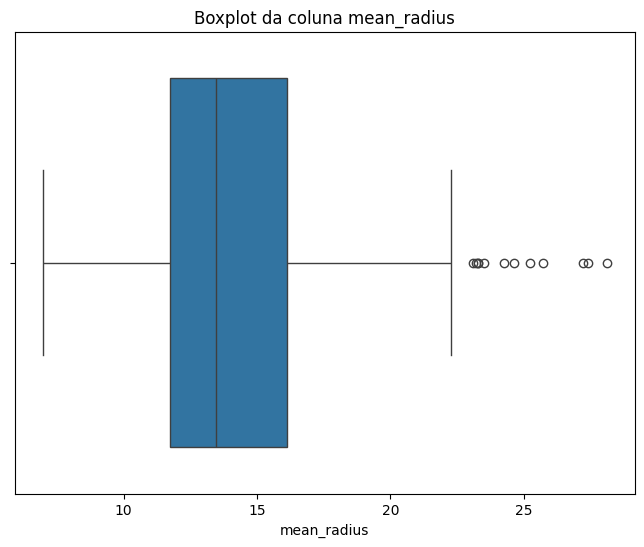

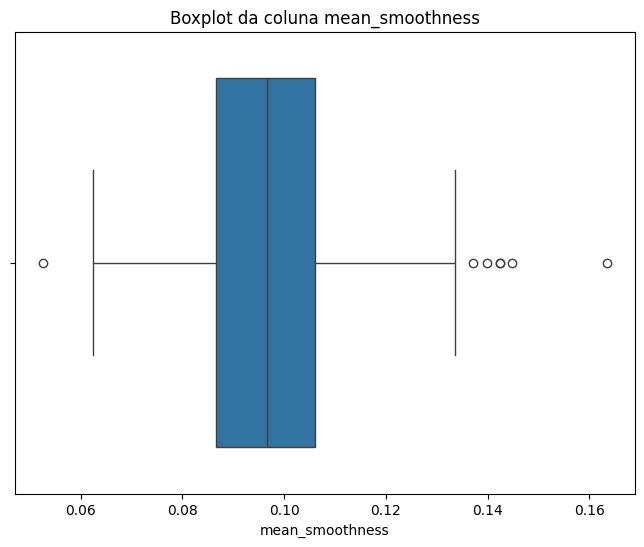

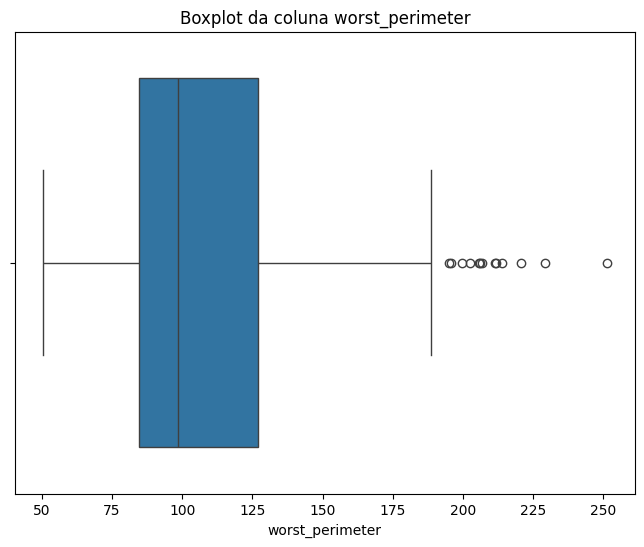

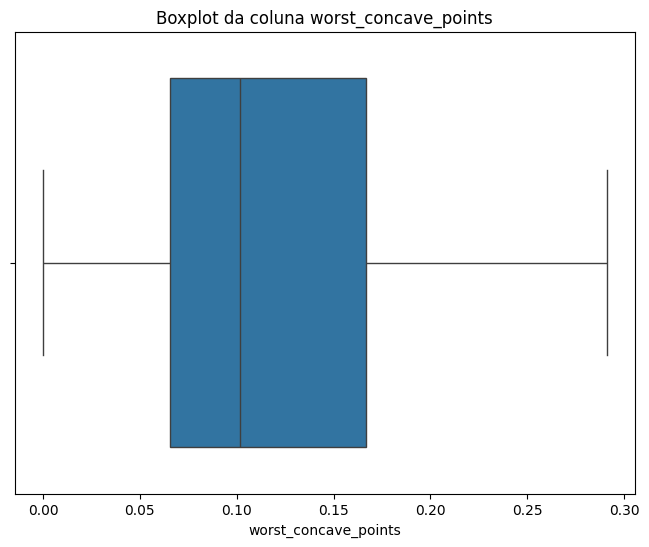

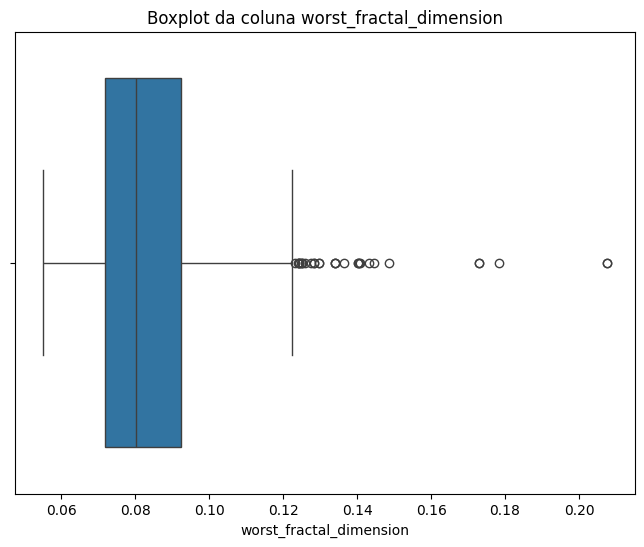

In [8]:
for coluna in colunas_com_nan:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df_breast_cancer[coluna])
  plt.title(f'Boxplot da coluna {coluna}')
  plt.show()

<Axes: xlabel='worst_concave_points', ylabel='Count'>

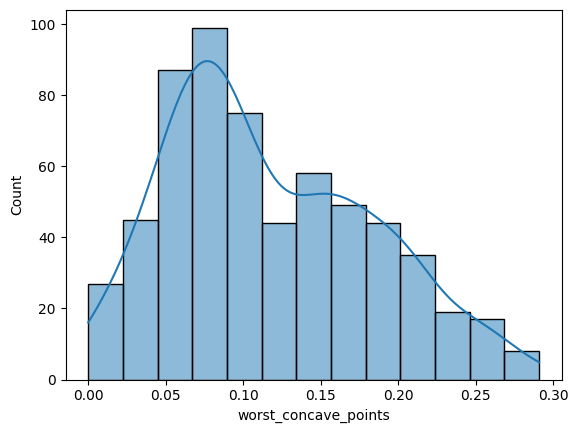

In [9]:
sns.histplot(df_breast_cancer['worst_concave_points'], kde=True)

In [10]:
for coluna in colunas_com_nan:
  mediana = df_breast_cancer[coluna].median()
  print(f'Coluna: {coluna}')
  df_breast_cancer[coluna] = df_breast_cancer[coluna].fillna(mediana)

Coluna: mean_radius
Coluna: mean_smoothness
Coluna: worst_perimeter
Coluna: worst_concave_points
Coluna: worst_fractal_dimension


In [11]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              609 non-null    float64
 1   mean_texture             609 non-null    float64
 2   mean_perimeter           609 non-null    float64
 3   mean_area                609 non-null    float64
 4   mean_smoothness          609 non-null    float64
 5   mean_compactness         609 non-null    float64
 6   mean_concavity           609 non-null    float64
 7   mean_concave_points      609 non-null    float64
 8   mean_symmetry            609 non-null    float64
 9   mean_fractal_dimension   609 non-null    float64
 10  radius_error             609 non-null    float64
 11  texture_error            609 non-null    float64
 12  perimeter_error          609 non-null    float64
 13  area_error               609 non-null    float64
 14  smoothness_error         6

# deteccao de dados redundantes



In [13]:
df_breast_cancer.duplicated().sum()

25

In [14]:
df_breast_cancer = df_breast_cancer.drop_duplicates()
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              584 non-null    float64
 1   mean_texture             584 non-null    float64
 2   mean_perimeter           584 non-null    float64
 3   mean_area                584 non-null    float64
 4   mean_smoothness          584 non-null    float64
 5   mean_compactness         584 non-null    float64
 6   mean_concavity           584 non-null    float64
 7   mean_concave_points      584 non-null    float64
 8   mean_symmetry            584 non-null    float64
 9   mean_fractal_dimension   584 non-null    float64
 10  radius_error             584 non-null    float64
 11  texture_error            584 non-null    float64
 12  perimeter_error          584 non-null    float64
 13  area_error               584 non-null    float64
 14  smoothness_error         584 no

#deteccao de outliers

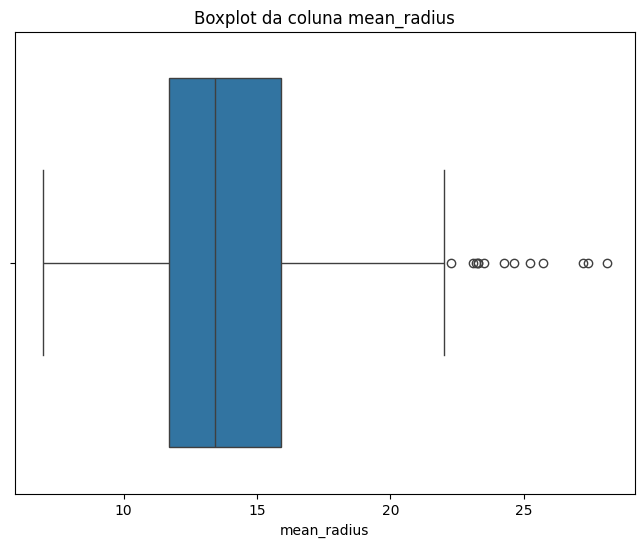

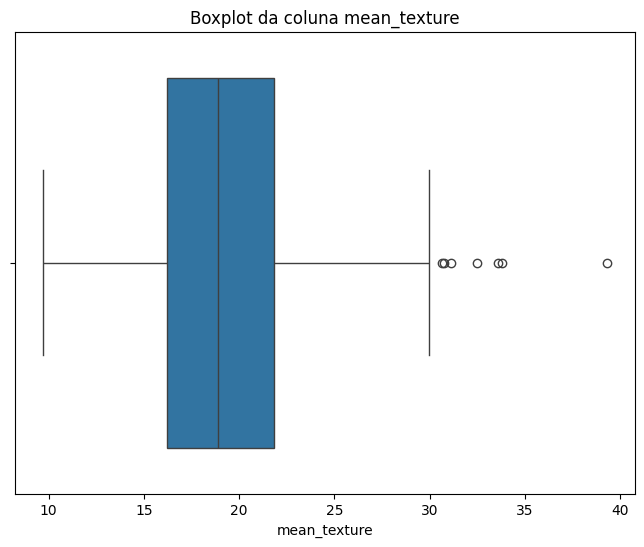

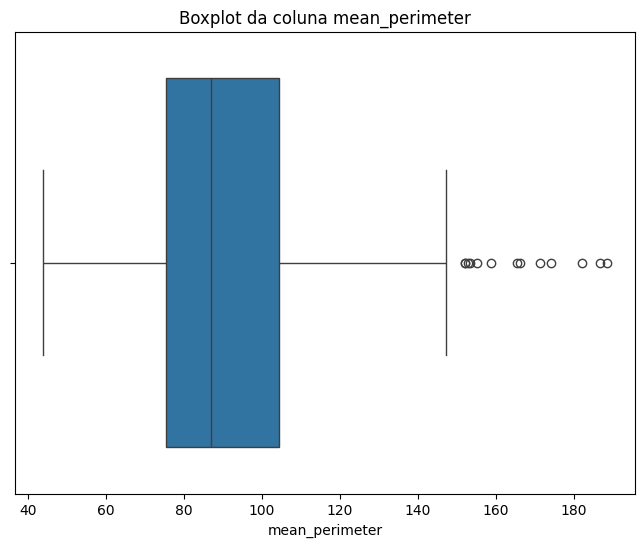

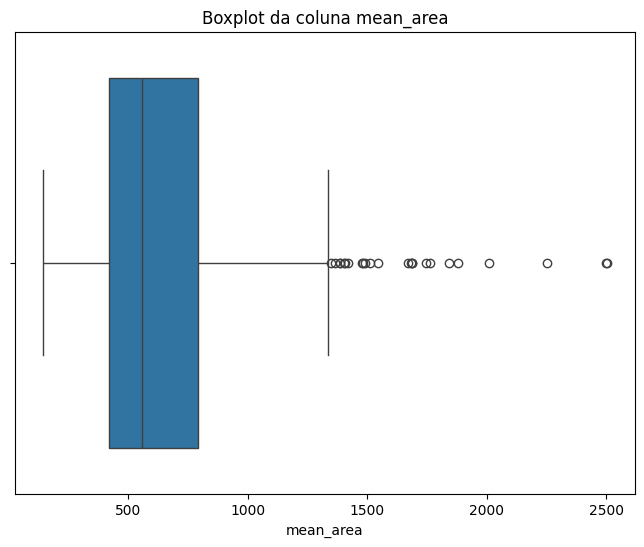

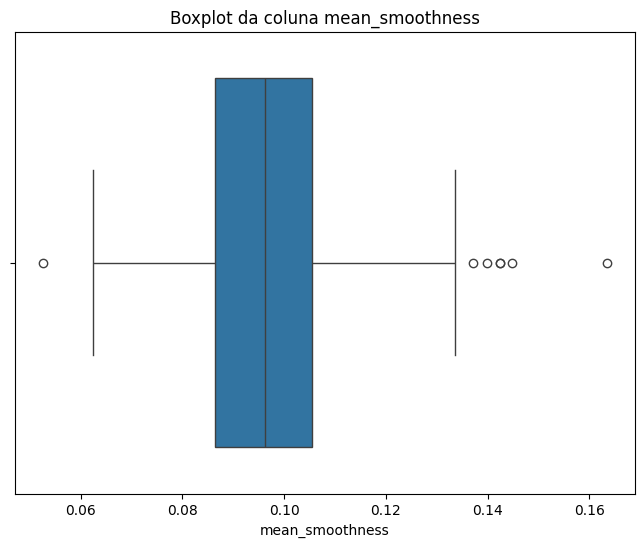

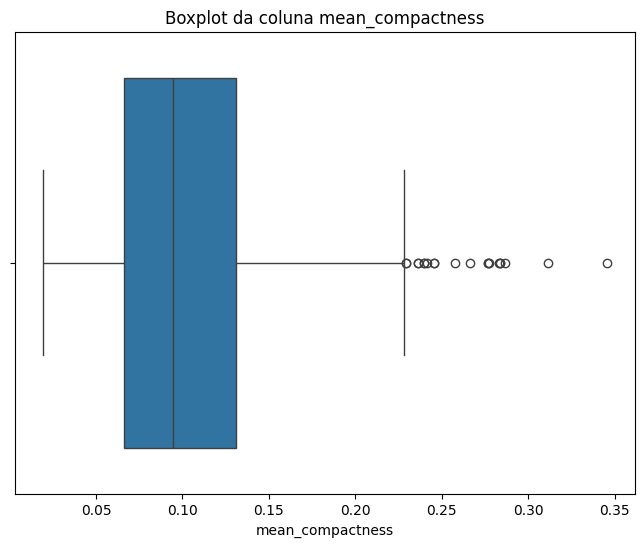

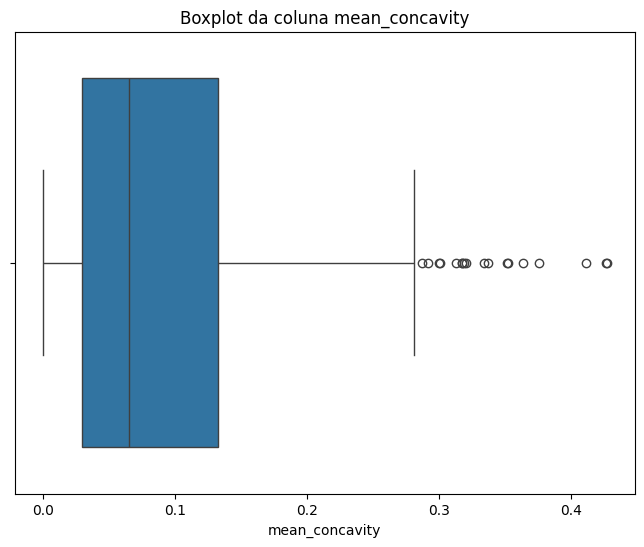

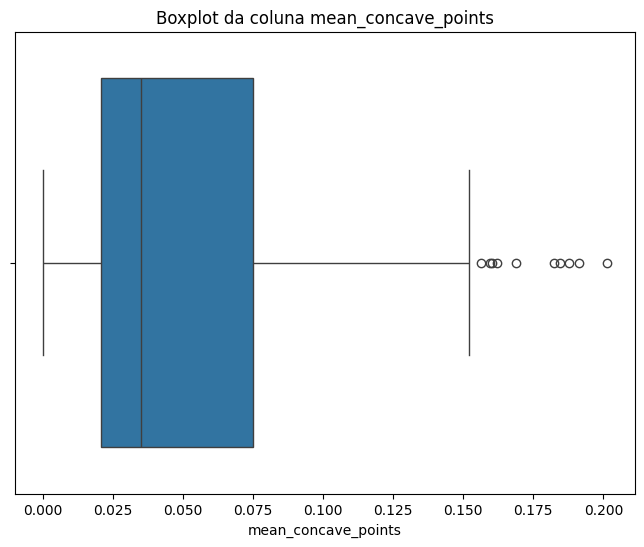

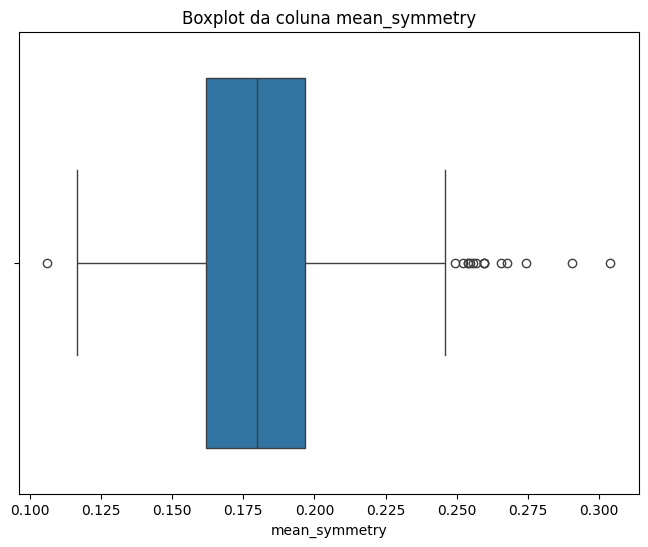

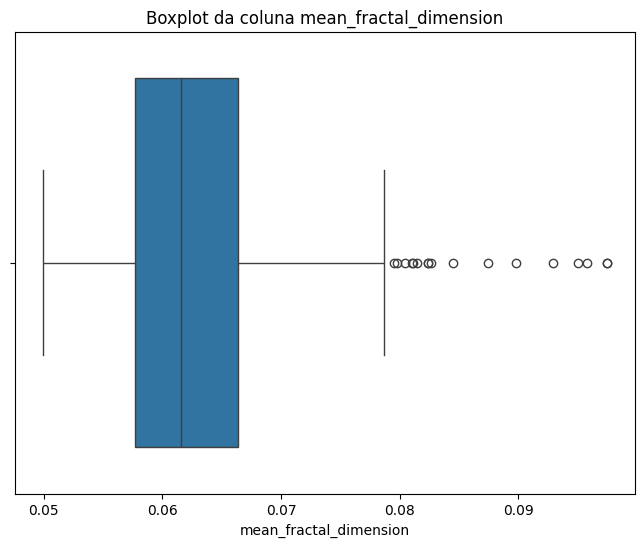

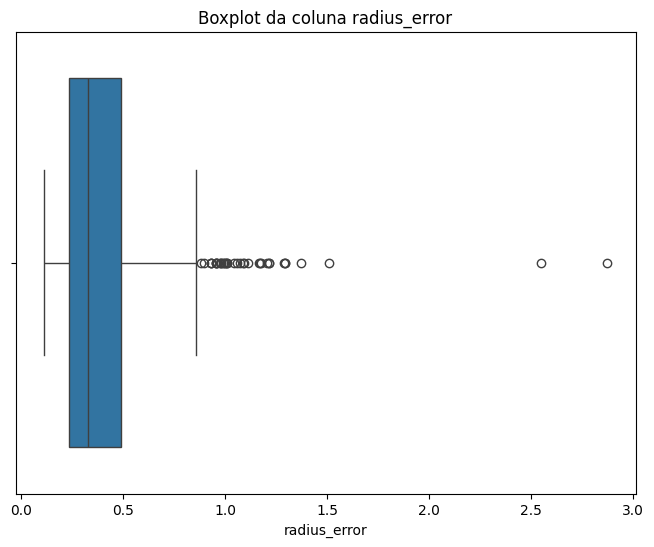

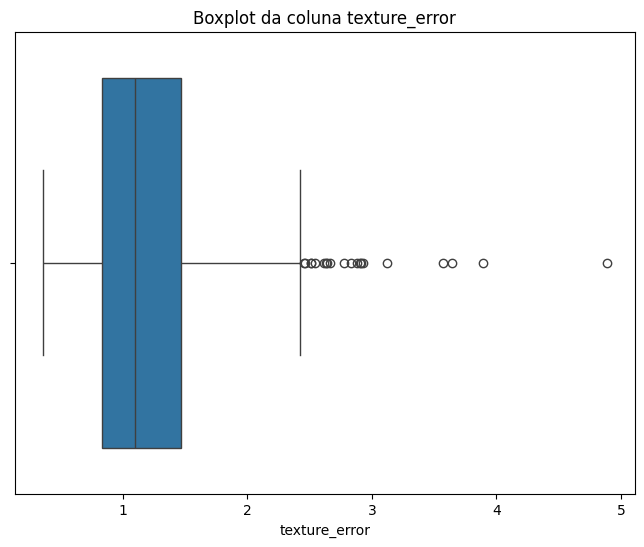

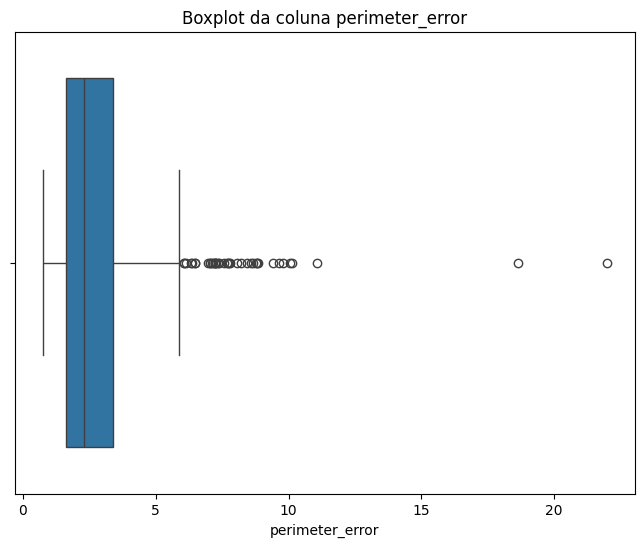

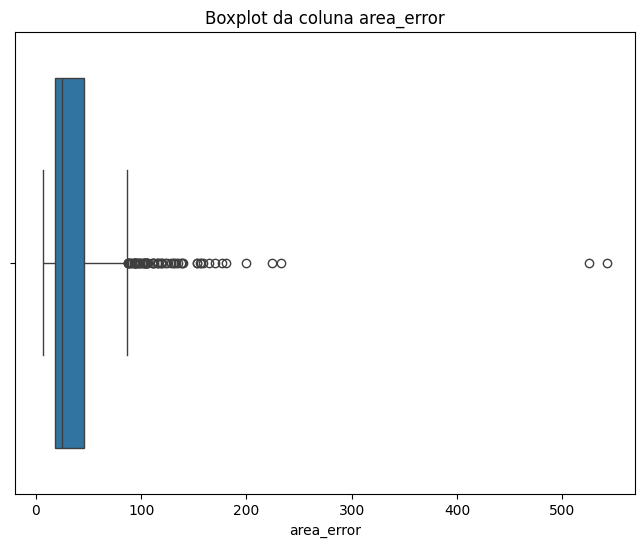

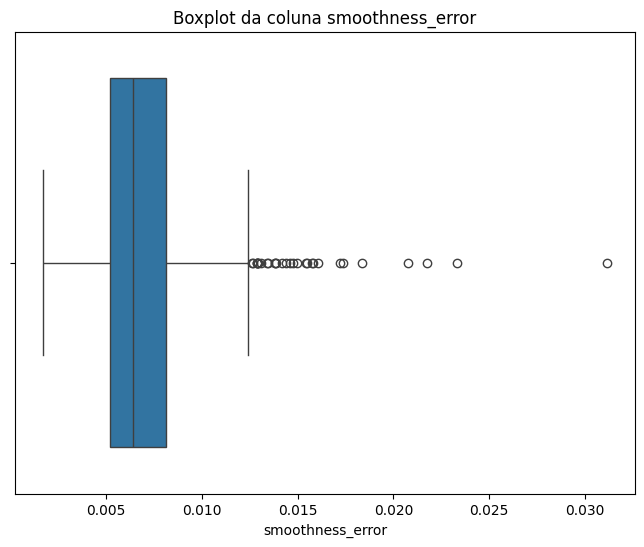

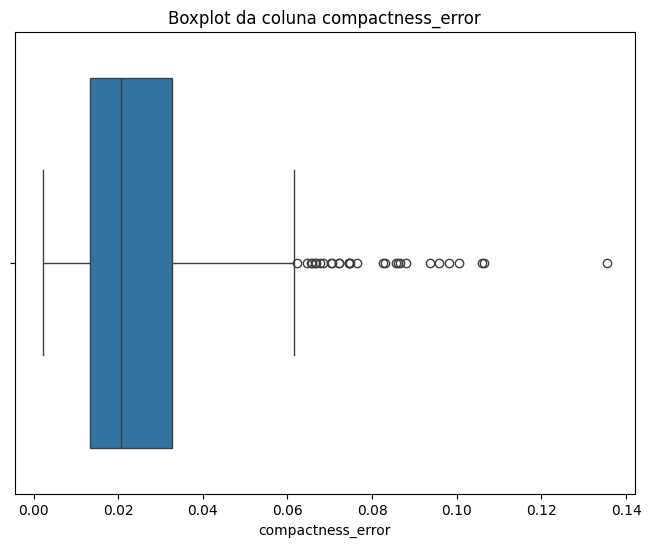

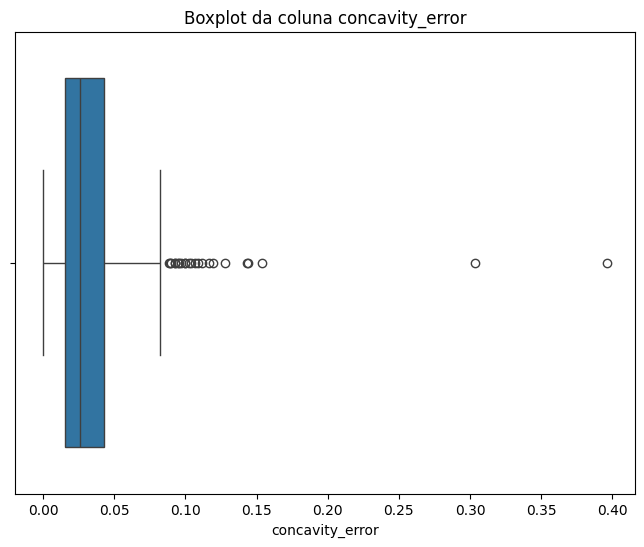

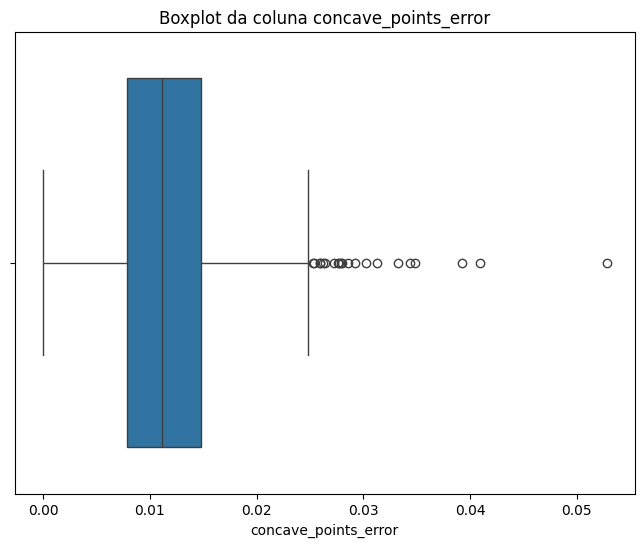

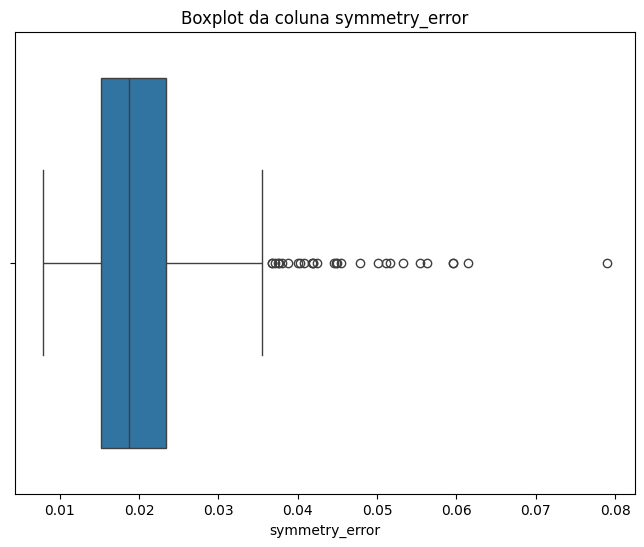

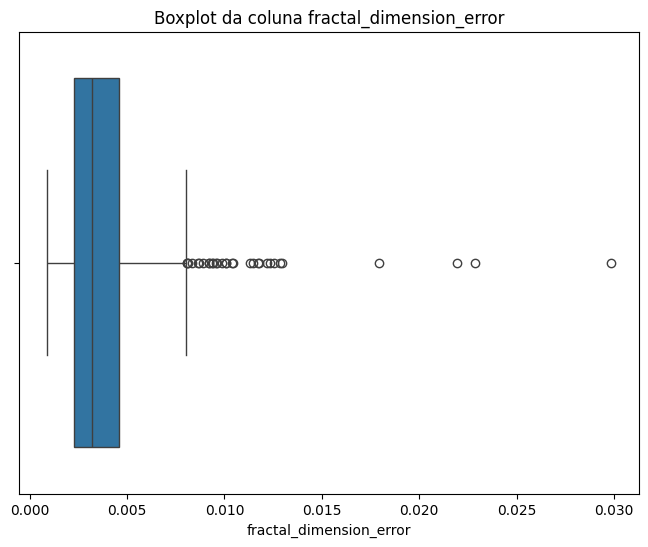

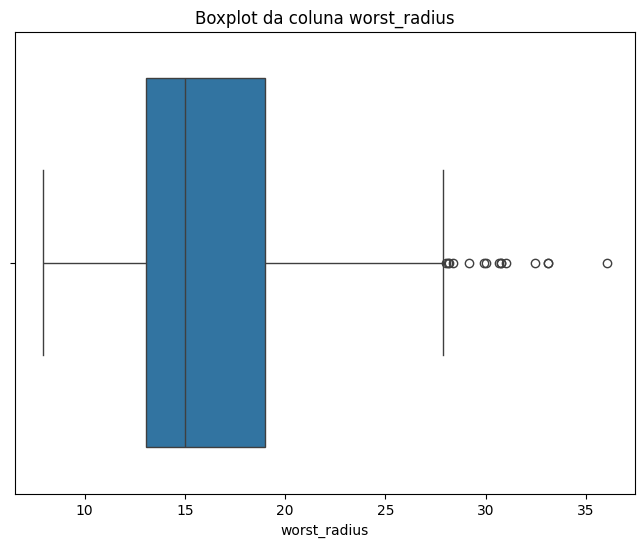

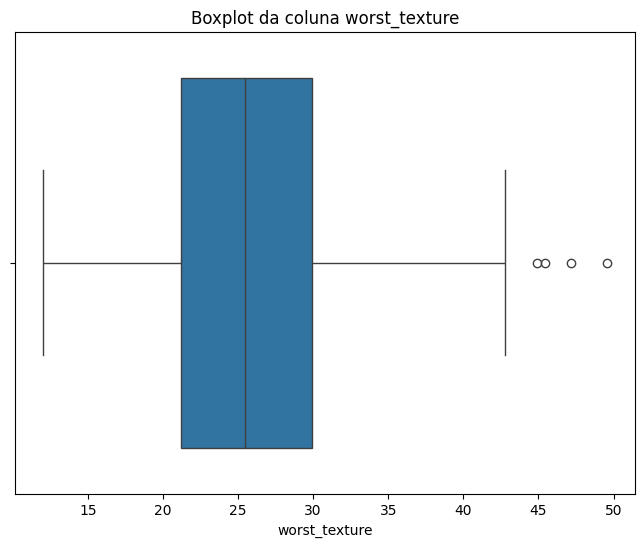

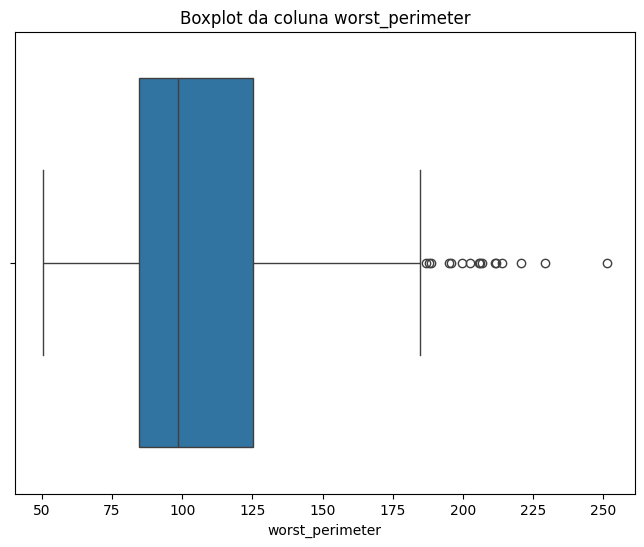

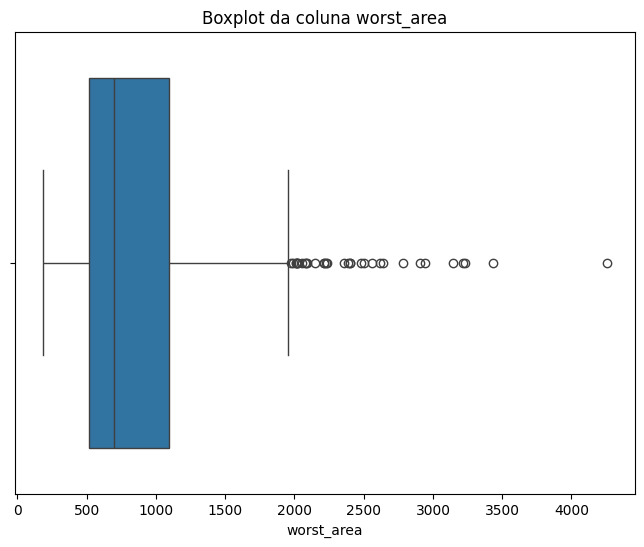

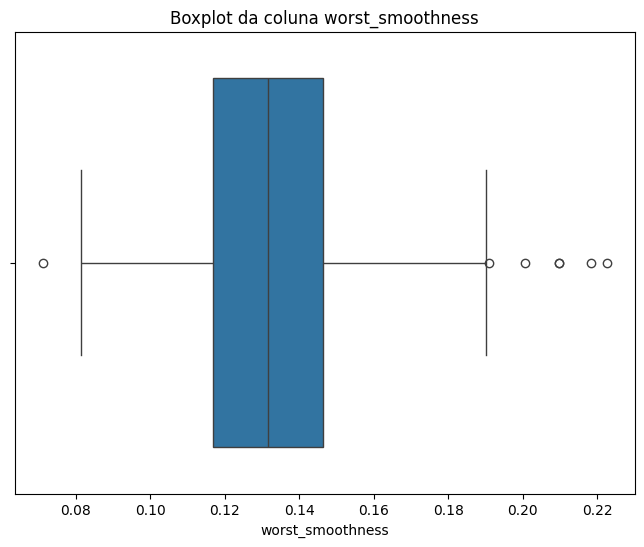

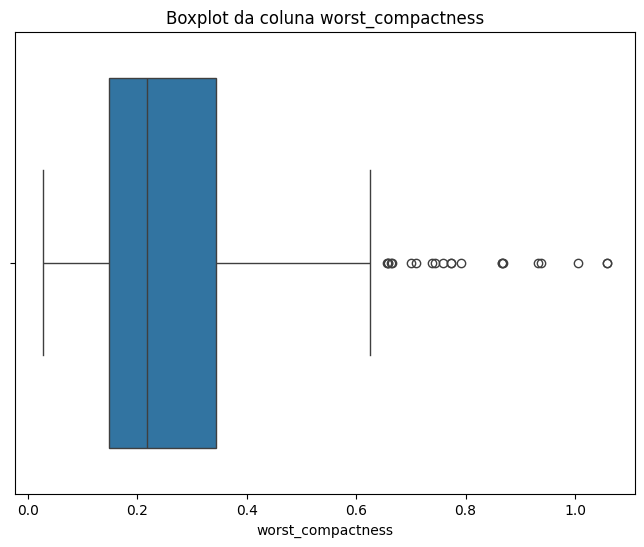

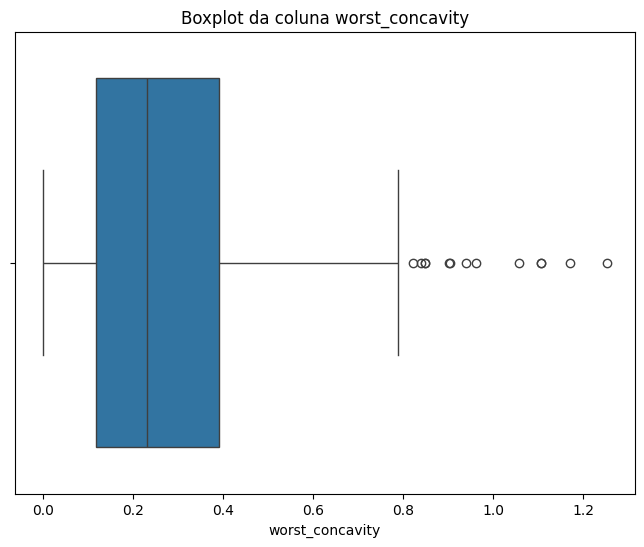

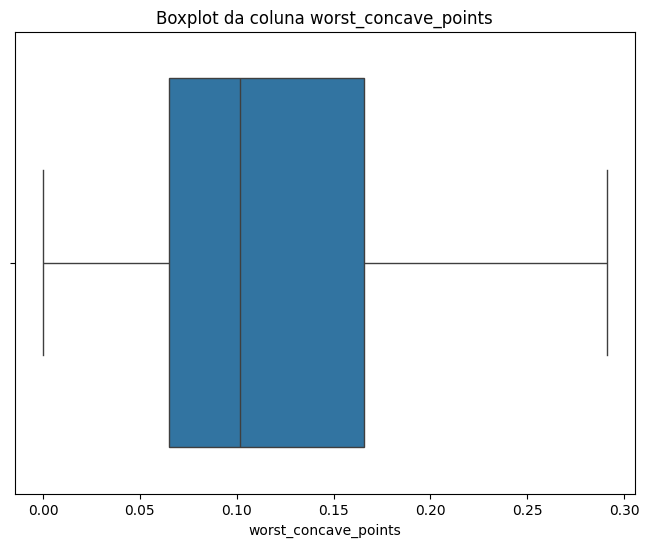

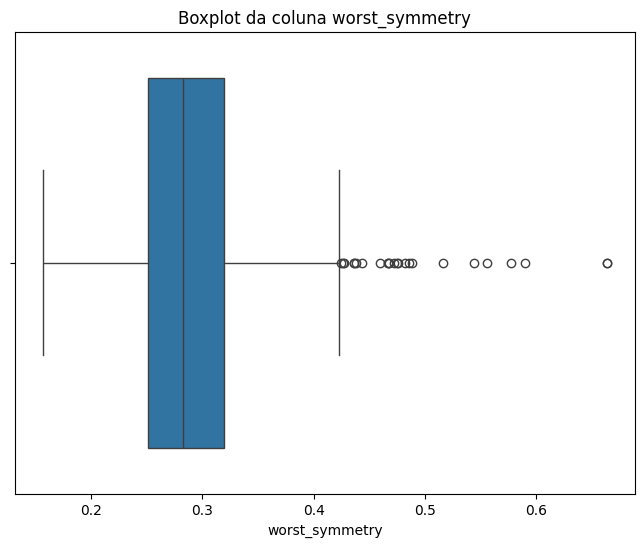

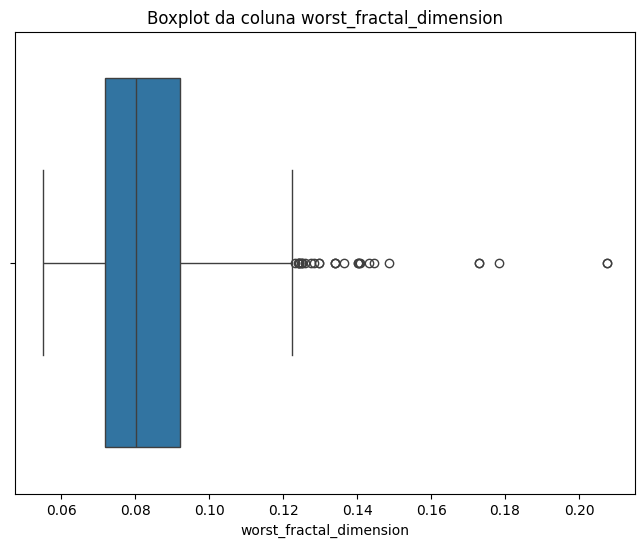

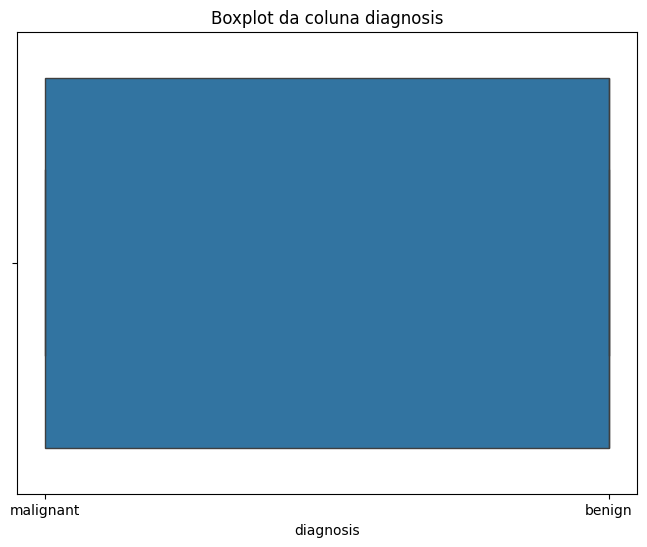

In [15]:
for coluna in df_breast_cancer.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df_breast_cancer[coluna])
  plt.title(f'Boxplot da coluna {coluna}')
  plt.show()

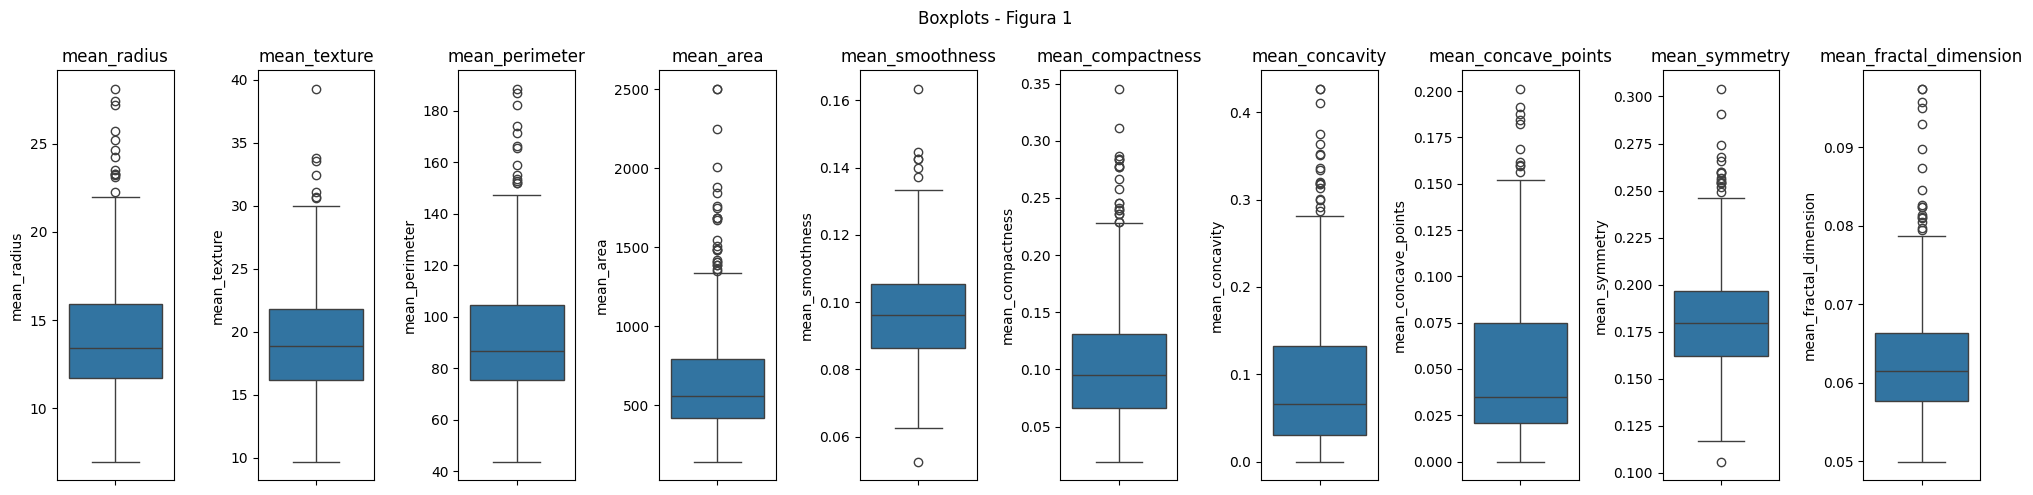

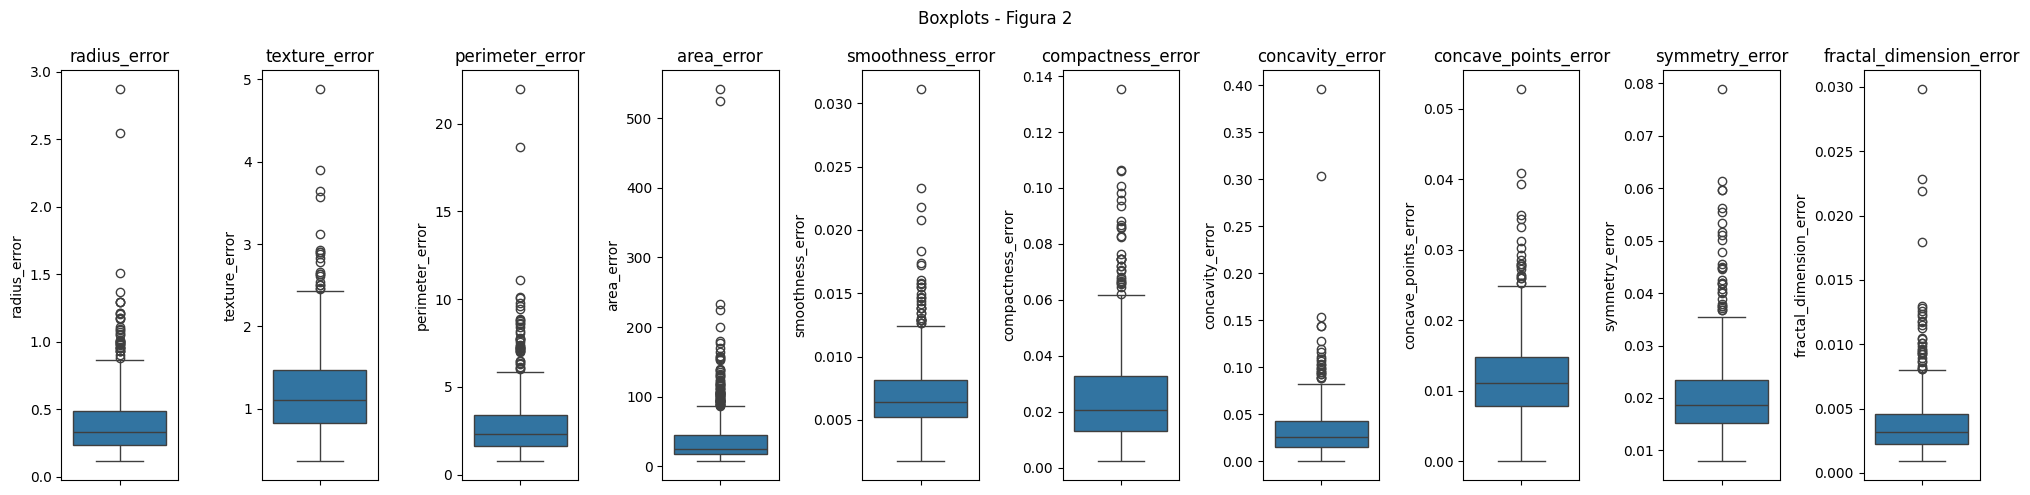

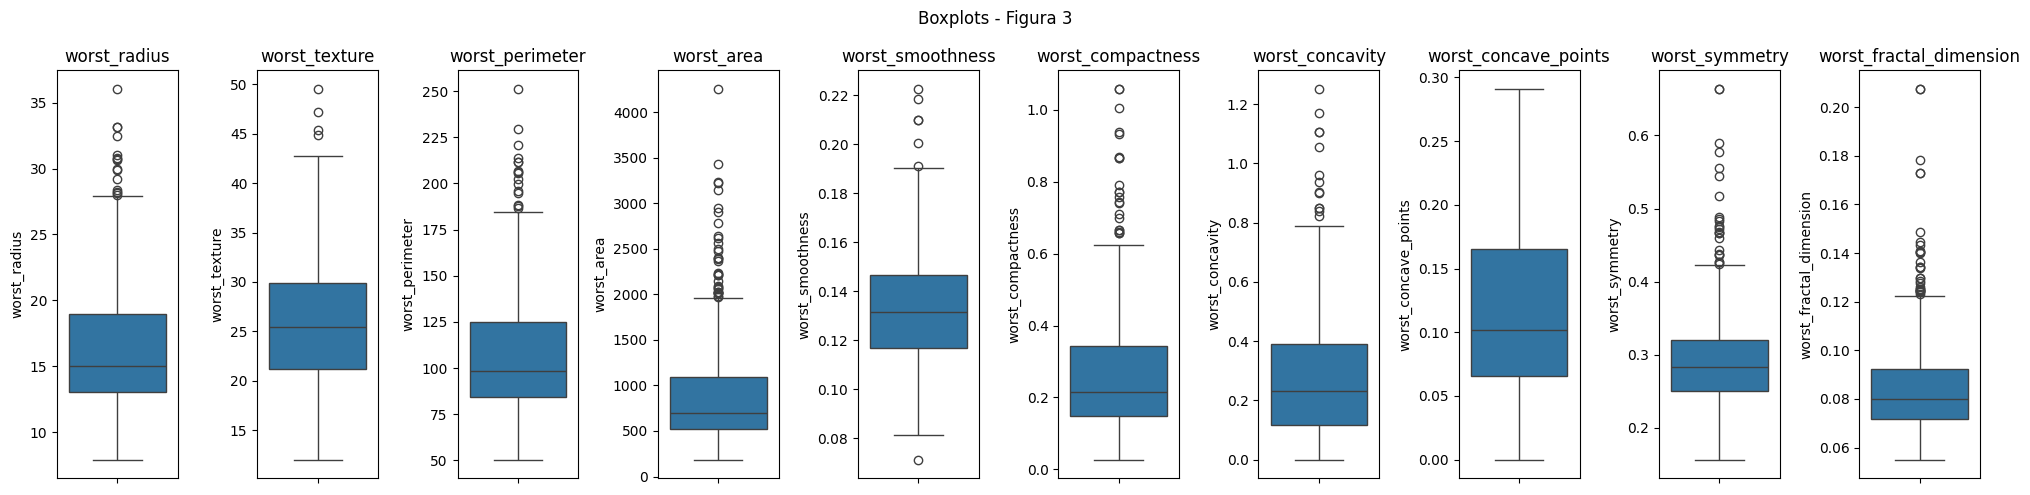

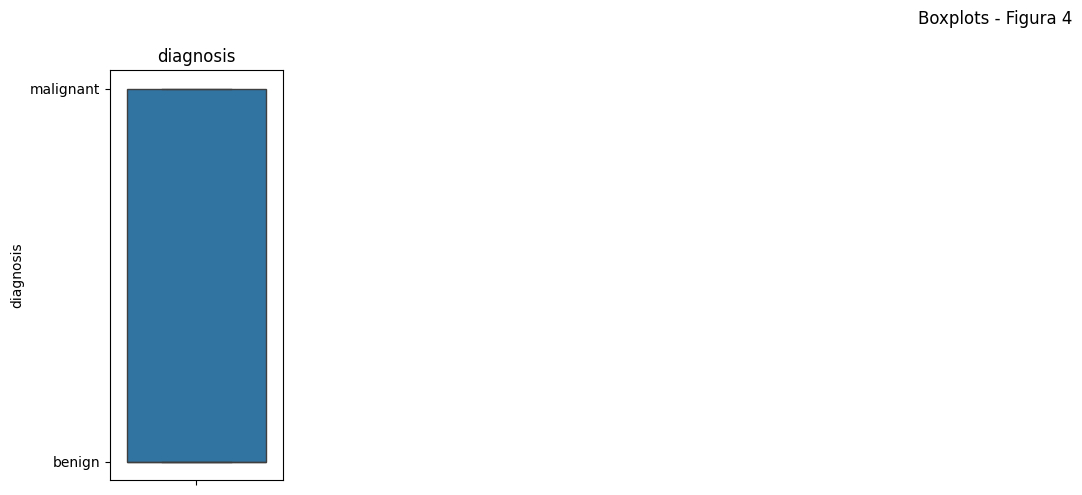

In [16]:
# prompt: gere 10  box-plots em cada figura um  ao lado do outro a partitr de "dados". como sao 30 atributos. divida os atributos entre 3 figuras

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supondo que 'df_breast_cancer' seja seu DataFrame

# Lista de colunas
colunas = df_breast_cancer.columns

# Divide as colunas em 3 grupos
num_colunas_por_figura = 10
num_figuras = (len(colunas) + num_colunas_por_figura - 1) // num_colunas_por_figura
grupos_colunas = [colunas[i:i + num_colunas_por_figura] for i in range(0, len(colunas), num_colunas_por_figura)]

# Cria as figuras e boxplots
for i, grupo_colunas in enumerate(grupos_colunas):
  plt.figure(figsize=(20, 5))  # Ajuste o tamanho conforme necessário
  plt.suptitle(f'Boxplots - Figura {i+1}')
  for j, coluna in enumerate(grupo_colunas):
    plt.subplot(1, num_colunas_por_figura, j + 1)
    sns.boxplot(y=df_breast_cancer[coluna])  # Use 'y' para boxplot vertical
    plt.title(coluna)
    plt.tight_layout()
  plt.show()


In [18]:
def conta_outliers(df):
  outliers_count = {} #armazena a quantidade de outliers
  #calcular a distancia IQR
  for coluna in df.columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    #definir os limites para outliers
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR

    #contar outliers
    outliers = df[(df[coluna] < limite_inf) | (df[coluna] > limite_sup)]
    outliers_count[coluna] = len(outliers)

  return outliers_count

In [19]:
d = df_breast_cancer.copy()
del d['diagnosis']
c = conta_outliers(d)
outliers_count_ordenado = dict(sorted(c.items(), key=lambda item: item[1], reverse=True))
outliers_count_ordenado

{'area_error': 66,
 'perimeter_error': 39,
 'radius_error': 37,
 'worst_area': 33,
 'fractal_dimension_error': 31,
 'smoothness_error': 30,
 'compactness_error': 30,
 'symmetry_error': 29,
 'worst_fractal_dimension': 29,
 'mean_area': 24,
 'worst_symmetry': 24,
 'concavity_error': 23,
 'concave_points_error': 21,
 'worst_compactness': 21,
 'mean_compactness': 20,
 'texture_error': 20,
 'mean_concavity': 18,
 'mean_fractal_dimension': 17,
 'mean_symmetry': 16,
 'worst_perimeter': 16,
 'worst_radius': 15,
 'mean_radius': 13,
 'mean_perimeter': 13,
 'worst_concavity': 13,
 'mean_concave_points': 10,
 'mean_texture': 7,
 'mean_smoothness': 7,
 'worst_smoothness': 7,
 'worst_texture': 4,
 'worst_concave_points': 0}

In [20]:
bins= pd.qcut(df_breast_cancer['area_error'], 10)

In [21]:
bins.value_counts()

area_error
(6.800999999999999, 13.226]    59
(19.209, 21.486]               59
(29.896, 39.097]               59
(92.249, 542.2]                59
(13.226, 16.842]               58
(16.842, 19.209]               58
(21.486, 24.755]               58
(24.755, 29.896]               58
(39.097, 54.168]               58
(54.168, 92.249]               58
Name: count, dtype: int64

In [22]:
grupos = df_breast_cancer['area_error'].groupby(bins)


/tmp/ipykernel_5842/2061882322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = df_breast_cancer['area_error'].groupby(bins)


In [23]:
medianas = grupos.median()
medianas

area_error
(6.800999999999999, 13.226]     11.360
(13.226, 16.842]                15.080
(16.842, 19.209]                17.965
(19.209, 21.486]                20.240
(21.486, 24.755]                23.120
(24.755, 29.896]                27.210
(29.896, 39.097]                33.270
(39.097, 54.168]                45.460
(54.168, 92.249]                69.830
(92.249, 542.2]                115.200
Name: area_error, dtype: float64

In [24]:
novo_area_error = bins.apply(lambda x: medianas[x])
df_breast_cancer['area_error'] = novo_area_error
df_breast_cancer['area_error']

0      45.46
1      20.24
2      27.21
3      45.46
4      27.21
       ...  
603    20.24
604    33.27
605    45.46
606    69.83
608    23.12
Name: area_error, Length: 584, dtype: category
Categories (10, float64): [11.360 < 15.080 < 17.965 < 20.240 ... 33.27 < 45.46 < 69.83 < 115.20]

<Axes: xlabel='area_error'>

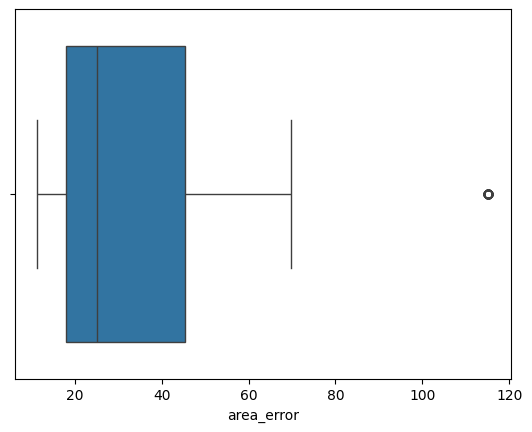

In [25]:
sns.boxplot(x=df_breast_cancer['area_error'])

#Transformacao simbolico numerica


##dataset CMC


In [29]:
df_cmc = pd.read_csv('datasets/cmc.csv')
df_cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education             1473 non-null   int64
 2   husband_education          1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   wife_religion              1473 non-null   int64
 5   wife_working_now           1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   std_living_index           1473 non-null   int64
 8   media_exposure             1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [30]:
df_cmc.head()

oneHotHusbandOcc = pd.get_dummies(df_cmc['husband_occupation'], prefix='husband_occupation')
oneHotHusbandOcc


,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1468,False,True,False,False
1469,True,False,False,False
1470,True,False,False,False
1471,False,True,False,False


In [31]:
df_cmc = pd.concat([df_cmc, oneHotHusbandOcc], axis=1)

df_cmc = df_cmc.drop('husband_occupation', axis=1)
df_cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education             1473 non-null   int64
 2   husband_education          1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   wife_religion              1473 non-null   int64
 5   wife_working_now           1473 non-null   int64
 6   std_living_index           1473 non-null   int64
 7   media_exposure             1473 non-null   int64
 8   contraceptive_method_used  1473 non-null   int64
 9   husband_occupation_1       1473 non-null   bool 
 10  husband_occupation_2       1473 non-null   bool 
 11  husband_occupation_3       1473 non-null   bool 
 12  husband_occupation_4       1473 non-null   bool 
dtypes: bool(4), int64(9)
memory usage: 109.4 KB


In [32]:
# conversao numerico-simbolico
mean_radius_discretizada = pd.cut(df_breast_cancer['mean_radius'], bins=10, labels= range(10))
mean_radius_discretizada.value_counts()

mean_radius
2    188
3    134
1     79
4     58
5     52
6     40
0     19
7      7
8      4
9      3
Name: count, dtype: int64

In [33]:
df_cmc['mean_radius']= mean_radius_discretizada
df_cmc['mean_radius']


0         4
1         3
2         3
3         3
4         3
       ... 
1468    NaN
1469    NaN
1470    NaN
1471    NaN
1472    NaN
Name: mean_radius, Length: 1473, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [34]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale

In [36]:
df_breast = pd.read_csv('datasets/breast_cancer_custom.csv')


In [37]:
df_breast = df_breast.drop(['sample_id', 'diagnosis'], axis=1)
df_breast.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614
1,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,16.41,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362
2,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740
3,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397
4,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675


In [38]:
df_reescalados = df_breast.copy()
df_reescalados = df_reescalados.apply(minmax_scale)
df_reescalados

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.443419,0.459249,0.450625,0.295610,0.404351,0.399730,0.424321,0.436034,0.563131,0.257372,...,0.407328,0.506663,0.392898,0.240808,0.464439,0.426124,0.566054,0.772509,0.642421,0.269579
1,0.379526,0.196145,0.370811,0.229480,0.280581,0.276731,0.152413,0.187873,0.414646,0.191870,...,0.301672,0.194296,0.317695,0.153116,0.280195,0.325416,0.271725,0.473883,0.273802,0.187459
2,0.385205,0.235712,0.380001,0.243097,0.326171,0.234648,0.176898,0.202734,0.269697,0.208509,...,0.350053,0.219083,0.335126,0.197675,0.514627,0.296698,0.265735,0.430241,0.364676,0.277843
3,0.313739,0.516402,0.305853,0.186299,0.381421,0.201613,0.202085,0.223111,0.277273,0.184288,...,0.322305,0.619670,0.289805,0.177276,0.365383,0.162034,0.253115,0.406873,0.214075,0.124164
4,0.302854,0.710517,0.294036,0.175483,0.359484,0.168333,0.066050,0.162227,0.159091,0.214827,...,0.253291,0.788646,0.230490,0.127900,0.303969,0.111389,0.055935,0.266770,0.124384,0.142398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,NaN,0.602976,0.365835,0.218579,0.553128,0.429790,0.384021,0.366004,0.627778,0.438290,...,0.339025,0.669243,0.367000,0.186296,0.638117,0.610948,0.561182,0.588316,0.522965,0.518562
605,NaN,0.352384,0.352083,0.229480,NaN,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.325151,0.640991,NaN,0.169092,0.386515,0.285444,0.249840,0.576976,0.316578,0.236587
606,0.433007,0.370984,0.444406,0.277964,0.581114,0.560763,0.403468,0.510934,0.557576,0.497051,...,0.463536,0.518657,0.430251,0.277674,0.711418,0.384211,0.382109,0.712371,0.422038,0.388036
607,0.607175,0.420697,0.595743,0.473595,0.412386,0.255567,0.346532,0.472068,0.263636,0.084035,...,0.689790,0.502665,0.679267,0.543846,0.528495,0.279138,0.429073,0.820619,0.237138,0.138463


In [39]:
dados_padronizacao = df_breast.copy()
dados_padronizados = df_breast.apply(scale)
dados_padronizados

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0.613412,0.924131,0.682395,0.514165,0.039590,0.794005,1.123867,0.960923,1.270497,-0.109749,...,0.617767,0.846065,0.638340,0.477533,0.346881,1.218329,2.007629,1.623971,2.904650,0.580423
1,0.229233,-0.888191,0.205120,0.068120,-0.920010,0.057870,-0.327979,-0.322045,0.213102,-0.538139,...,0.003045,-1.044945,0.187884,-0.149786,-0.849176,0.599863,0.280745,0.312629,0.039142,-0.060133
2,0.263382,-0.615644,0.260079,0.159961,-0.566547,-0.193995,-0.197244,-0.245216,-0.819117,-0.429320,...,0.284534,-0.894891,0.292294,0.168972,0.672689,0.423499,0.245598,0.120983,0.745558,0.644888
3,-0.166328,1.317810,-0.183312,-0.223139,-0.138192,-0.391705,-0.062756,-0.139865,-0.765168,-0.587728,...,0.123092,1.530185,0.020827,0.023043,-0.296160,-0.403505,0.171555,0.018369,-0.425162,-0.553852
4,-0.231781,2.654921,-0.253973,-0.296097,-0.308274,-0.590884,-0.789117,-0.454633,-1.606768,-0.387996,...,-0.278443,2.553137,-0.334467,-0.330175,-0.694846,-0.714525,-0.985339,-0.596860,-1.122385,-0.411620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,NaN,1.914152,0.175368,-0.005410,1.193069,0.973909,0.908686,0.598875,1.730859,1.073490,...,0.220371,1.830294,0.483216,0.087568,1.474348,2.353375,1.979043,0.815134,1.976041,2.522556
605,NaN,0.188021,0.093136,0.068120,NaN,-0.632372,-0.216636,0.057989,-0.847890,-0.517477,...,0.139650,1.659264,NaN,-0.035504,-0.158978,0.354384,0.152342,0.765336,0.371663,0.323075
606,0.550805,0.316141,0.645205,0.395143,1.410046,1.757774,1.012523,1.348151,1.230934,1.457802,...,0.944790,0.918672,0.862077,0.741260,1.950199,0.960933,0.928385,1.359892,1.191474,1.504420
607,1.598047,0.658572,1.550168,1.714679,0.101883,-0.068797,0.708517,1.147214,-0.862276,-1.243399,...,2.261163,0.821862,2.353656,2.645368,0.762715,0.315655,1.203937,1.835235,-0.245877,-0.442317


In [41]:
#tecnicas de amostragem


dados = pd.read_csv('datasets/breast_cancer_custom.csv')

prporcao = dados['diagnosis'].value_counts(normalize=True)
prporcao

diagnosis
benign       0.617406
malignant    0.382594
Name: proportion, dtype: float64

In [42]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                609 non-null    int64  
 1   mean_radius              607 non-null    float64
 2   mean_texture             609 non-null    float64
 3   mean_perimeter           609 non-null    float64
 4   mean_area                609 non-null    float64
 5   mean_smoothness          608 non-null    float64
 6   mean_compactness         609 non-null    float64
 7   mean_concavity           609 non-null    float64
 8   mean_concave_points      609 non-null    float64
 9   mean_symmetry            609 non-null    float64
 10  mean_fractal_dimension   609 non-null    float64
 11  radius_error             609 non-null    float64
 12  texture_error            609 non-null    float64
 13  perimeter_error          609 non-null    float64
 14  area_error               6

In [43]:
amostra_simples = dados.sample(10)
amostra_simples

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
506,91594602,15.05,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.04335,0.1561,...,28.06,113.80,967.0,0.1246,0.21010,0.28660,0.11200,0.2282,0.06954,malignant
48,897630,18.77,21.43,122.90,1092.0,0.09116,0.14020,0.106000,0.06090,0.1953,...,34.37,161.10,1873.0,0.1498,0.48270,0.46340,0.20480,0.3679,0.09870,malignant
222,9113816,12.04,28.14,76.85,449.9,0.08752,0.06000,0.023670,0.02377,0.1854,...,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639,benign
544,88147101,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,...,19.80,73.47,395.4,0.1341,0.11530,0.02639,0.04464,0.2615,0.08269,benign
458,874373,11.71,17.19,74.68,420.3,0.09774,0.06141,0.038090,0.03239,0.1516,...,21.39,84.42,521.5,0.1323,0.10400,0.15210,0.10990,0.2572,0.07097,benign
56,8811523,11.89,18.35,77.32,432.2,0.09363,0.11540,0.066360,0.03142,0.1967,...,27.10,86.20,531.2,0.1405,0.30460,0.28060,0.11380,0.3397,0.08365,benign
549,89864002,11.71,15.45,75.03,420.3,0.11500,0.07281,0.040060,0.03250,0.2009,...,18.16,84.16,516.4,0.1460,0.11150,0.10870,0.07864,0.2765,0.07806,benign
470,9010598,12.76,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.01781,0.1759,...,25.99,87.82,579.7,0.1298,0.18390,0.12550,0.08312,0.2744,0.07238,benign
541,8813129,13.27,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.02456,0.1496,...,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.2506,0.07623,benign
40,907409,10.48,14.98,67.49,333.6,0.09816,0.10130,0.063350,0.02218,0.1925,...,21.57,81.41,440.4,0.1327,0.29960,0.29390,0.09310,0.3020,0.09646,benign


In [44]:

prporcao = amostra_simples['diagnosis'].value_counts(normalize=True)
prporcao

diagnosis
benign       0.8
malignant    0.2
Name: proportion, dtype: float64

In [45]:
#amostragem estatificada
classes = dados['diagnosis'].unique()
tamanho_amostra = 10
qtd_por_classe = round(tamanho_amostra/len(classes))
amostras_por_classes = []
for classe in classes:
  indice_c = dados['diagnosis'] == classe
  obs_c = dados[indice_c]
  proporcao_c = len(obs_c)/len(dados)
  qtd_c = round(proporcao_c * tamanho_amostra)
  amostra_c = obs_c.sample(qtd_c)
  amostras_por_classes.append(amostra_c)

amostra_estratificada = pd.concat(amostras_por_classes)
amostra_estratificada

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
589,911320503,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,malignant
0,9012315,16.350,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,...,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614,malignant
64,846381,15.850,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,27.66,112.00,876.5,0.1131,0.19240,0.23220,0.11190,0.2809,0.06287,malignant
444,855167,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,...,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146,malignant
405,8610908,12.860,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,...,24.82,91.88,622.1,0.1289,0.21410,0.17310,0.07926,0.2779,0.07918,benign
464,91903902,13.680,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,...,20.20,101.60,773.4,0.1264,0.15640,0.12060,0.08704,0.2806,0.07782,benign
304,86561,13.850,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,...,23.58,100.30,725.9,0.1157,0.13500,0.08115,0.05104,0.2364,0.07182,benign
367,862965,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,...,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,benign
314,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,22.80,64.01,317.0,0.1460,0.13100,0.00000,0.00000,0.2445,0.08865,benign
337,862722,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382,benign


In [46]:

prporcao = amostra_estratificada['diagnosis'].value_counts(normalize=True)
prporcao

diagnosis
benign       0.6
malignant    0.4
Name: proportion, dtype: float64